<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - Fine Tuning


## Helper Functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-05 12:21:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-05 12:21:48 (67.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
## Import helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Get Data

Im going to use keras.applications for the models

In [3]:
# Get 10 % of training data\
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-09-05 12:21:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   167MB/s    in 1.0s    

2022-09-05 12:21:53 (167 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data('10_food_classes_10_percent.zip')

In [5]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/gri

In [6]:
# Create training and test dir paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [7]:
import tensorflow as tf


In [8]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
#for images, labels in train_data_10_percent.take(1):
  #print(images,labels)

## Build the model using KERAS FUNCTIONAL API

# Model 0: Transfer Learning model using Keras Functional API

In [10]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (the pre trained weights will be freezed)
base_model.trainable = False

# 3. Create the input
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# 4. If using a model like ResNet50V2 need to normalize inputs (not on EfficientNet's beacause its already have a rescaling layer)
# x = tf.keras.layers.exprimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing input: {x.shape}")

# 6. Average Pool the outputs (aggreagte all the most important information)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_layer')(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the ouput activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. Combine inputs with the ouputs
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())

# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent, batch_size=BATCH_SIZE, epochs=5, steps_per_epoch=len(train_data_10_percent), validation_data=test_data, validation_steps=len(test_data), callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_feature_extraction")])

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing input: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220905-122200
Epoch 1/5
24/24 [==============================] - 189s 8s/step - loss: 1.9211 - accuracy: 0.3733 - val_loss: 1.3557 - val_accuracy: 0.7100
Epoch 2/5
24/24 [==============================] - 157s 7s/step - loss: 1.1761 - accuracy: 0.7453 - val_loss: 0.9327 - val_accuracy: 0.7988
Epoch 3/5
24/24 [==============================] - 183s 8s/step - loss: 0.8456 - accuracy: 0.7987 - val_loss: 0.7596 - val_accuracy: 0.8220
Epoch 4/5
24/24 [==============================] - 165s 7s/step - loss: 0.6927 - accuracy: 0.8493 - val_loss: 0.6704 - val_accuracy: 0.8316
Epoch 5/5
24/24 [==============================] - 179s 8s/step - loss: 0.5974 - accuracy: 0.8653 - val_loss: 0.6132 - val_accuracy: 0.8384


In [11]:
# Evalute
model_0.evaluate(test_data)

79/79 [==============================] - 123s 2s/step - loss: 0.6132 - accuracy: 0.8384


[0.6132277250289917, 0.8384000062942505]

In [12]:
# Check the layers in our model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [13]:
# Base model summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [14]:
# Summary of whole model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_layer (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


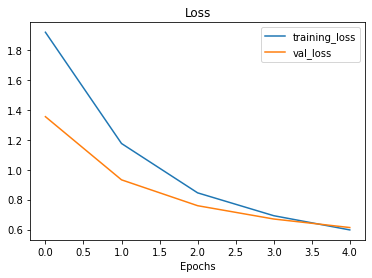

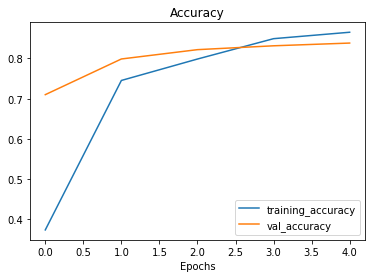

In [15]:
plot_loss_curves(history_0)

### Getting a feature vector from  a trined model (Shape after GlobalAveragePooling2D: (None, 1280))

Demostrate the GlobalAveragePooling2D layer, it transofrm a 4D tensor in a 2D tensor. After the model go through the base_model it has shape of (None,7,7,1280) after GlobalVaregePooling (None, 1280)


In [16]:
# Define the input shape
input_shape = (1,4,4,3)
# Create random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"random input tensor\n {input_tensor}\n")
# Pass the random tensor through a GlobalAveragePooling2D
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"global_average_pooled_tensor \n {global_average_pooled_tensor}\n")
# Check the shape
print(f"shape input tensor\n {input_tensor.shape}\n")
print(f"shape global_average_pooled_tensor tensor\n {global_average_pooled_tensor.shape}\n")

random input tensor [[[[ 3.27468514e-01 -8.42625797e-01  3.19433689e-01 -1.40755188e+00]
   [-2.38805985e+00 -1.03924787e+00 -5.57323217e-01  5.39707005e-01]
   [ 1.69943225e+00  2.88936555e-01 -1.50661159e+00 -2.64547437e-01]
   [-5.97224057e-01 -1.91711318e+00 -6.20441437e-01  8.50402296e-01]]

  [[-4.06047940e-01 -3.02584124e+00  9.05846417e-01  2.98559874e-01]
   [-2.25615546e-01 -7.61644304e-01 -1.89171398e+00 -9.38471198e-01]
   [ 7.78522134e-01 -4.73388970e-01  9.77726936e-01  2.46944040e-01]
   [ 2.05737472e-01 -5.25623322e-01  3.24100167e-01  2.54540909e-02]]

  [[-1.06384970e-01 -6.36947513e-01  1.16031218e+00  2.50735909e-01]
   [-4.17284966e-01  4.01257783e-01 -1.41454422e+00 -5.93185663e-01]
   [-1.66172135e+00  3.35671932e-01  1.08156286e-01  2.34796807e-01]
   [-5.66687644e-01 -3.58198434e-01  8.86986256e-01  5.27447701e-01]]

  [[ 7.04022467e-01 -3.34212482e-01  2.16396436e-01 -9.74854469e-01]
   [-2.07576796e-01 -3.64772901e-02 -1.33534443e+00  6.88585579e-01]
   [ 1.1

### Running a series of transfer learnign experiments

1. `model_1` - use feature extraction with 1 %^of training data with data augmentation
2. `model_2` - use feature extraction with 10% and data augmentation
3. `model_3` - use fine tuning of 10% data and data augmentation
4. `model_4` - ude fine tuning on 100 % data and data augmentation

Using for all the expriments the same test set to ensure consistency across evaluation metrics


### Download and unzip  data for model_1

In [17]:
# Download and unzip  data for model_1
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2022-09-05 12:44:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  94.3MB/s    in 1.4s    

2022-09-05 12:44:45 (94.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [18]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'

In [19]:
# Create training and test dir
train_dir = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [20]:
# Setup data loaders
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Data augmentation

To add data augmentation we can use
 
 * `tf.keras.exprimental.preprocessing()`

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [27]:
# Create Data augmentation with horizontal flipping, rotations, zooms ecc
data_augmentation =  keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.Rescaling(1./255) # Keep for ResNet but not for efficientNet
], name='data_augmentation')